# Task 1

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_excel('AirQualityUCI.xlsx')

# Print dataset description
print("Dataset Shape:", df.shape,"\n")
print(f"Number of instances: {df.shape[0]}\n")
print (f"Number of Features: {df.shape[1]}\n")
print("Features:", df.columns.tolist(),"\n")
print("First Few Rows:\n")
print(df.head())


Dataset Shape: (9357, 15) 

Number of instances: 9357

Number of Features: 15

Features: ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'] 

First Few Rows:

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00  

# Task 2


In [2]:
# Drop 'Date' and 'Time' columns as they are unique ID columns for correlation analysis
df_numeric = df.drop(columns=['Date', 'Time'])

# Compute the correlation matrix
correlation_matrix = df_numeric.corr().abs()

# For each attribute, sum the absolute correlations with all other attributes
# Subtract 1 from the diagonal (correlation of the attribute with itself)A
sum_of_correlations = correlation_matrix.sum() - 1

# Find the attribute with the highest sum of correlations
most_influential_attribute = sum_of_correlations.idxmax()
max_sum_of_correlations = sum_of_correlations.max()

# Print the most important attribute
print(f"The most important attribute based on correlation with all others is '{most_influential_attribute}' with a total correlation sum of {max_sum_of_correlations:.2f}")


The most important attribute based on correlation with all others is 'PT08.S1(CO)' with a total correlation sum of 6.52


Mean of PT08.S1(CO): 1048.87
Median of PT08.S1(CO): 1052.50
Mode of PT08.S1(CO): -200.00
Standard Deviation of PT08.S1(CO): 329.82
Variance of PT08.S1(CO): 108779.26
Min of PT08.S1(CO): -200.00
Max of PT08.S1(CO): 2039.75
Range of PT08.S1(CO): 2239.75



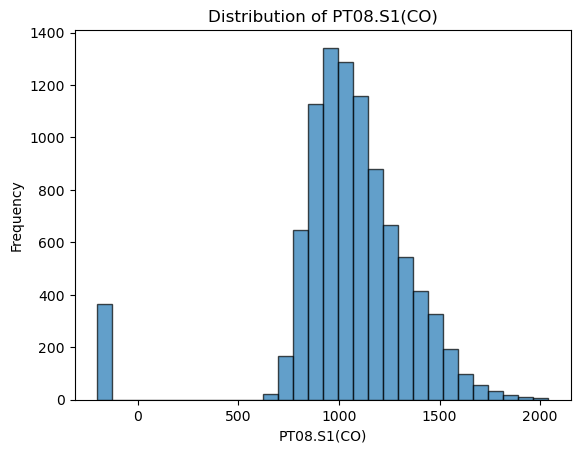

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('AirQualityUCI.xlsx')

# Select a numerical attribute for analysis
attribute = 'PT08.S1(CO)'

# Compute measures of central tendency and dispersion
mean_value = df[attribute].mean()
median_value = df[attribute].median()
mode_value = df[attribute].mode()[0]
std_dev = df[attribute].std()
variance = df[attribute].var()
min_value = df[attribute].min()
max_value = df[attribute].max()
range_value = max_value - min_value

# Print results
print(f"Mean of {attribute}: {mean_value:.2f}")
print(f"Median of {attribute}: {median_value:.2f}")
print(f"Mode of {attribute}: {mode_value:.2f}")
print(f"Standard Deviation of {attribute}: {std_dev:.2f}")
print(f"Variance of {attribute}: {variance:.2f}")
print(f"Min of {attribute}: {min_value:.2f}")
print(f"Max of {attribute}: {max_value:.2f}")
print(f"Range of {attribute}: {range_value:.2f}\n")

# Visualization

plt.hist(df[attribute].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title(f'Distribution of {attribute}')
plt.xlabel(attribute)
plt.ylabel('Frequency')
plt.savefig('histogram.png')
plt.show()

In [4]:
# Print no. of missing values
missing_count = ((df[attribute] == -200)).sum()
print(f"Number of missing values (including -200): {missing_count}")

Number of missing values (including -200): 366


In [5]:
# Replace -200 values with NaN so we can handle them consistently as missing values
df[attribute] = df[attribute].replace(-200, pd.NA)

# Compute the median value for the attribute
median_value = df[attribute].median()

# Fill missing values (both NaN and previously -200) with the median
df[attribute] = df[attribute].fillna(median_value).infer_objects(copy=False)

# Verify if missing values are handled
print(df[attribute].isnull().sum())  # Should print 0 if all missing values are filled


0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2188\2424072556.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[attribute] = df[attribute].fillna(median_value).infer_objects(copy=False)


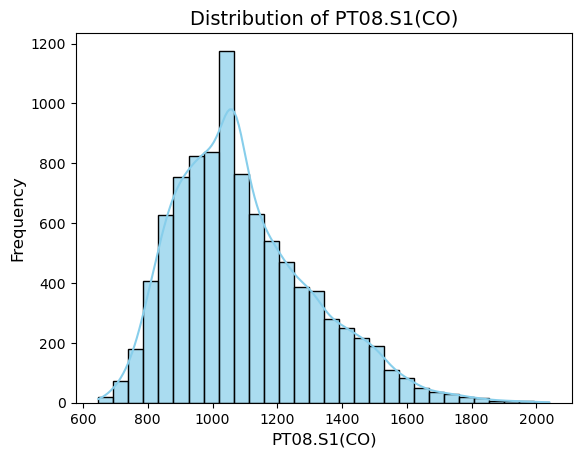

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn histogram (with KDE curve)
sns.histplot(df[attribute].dropna(), bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.title(f'Distribution of {attribute}', fontsize=14)
plt.xlabel(attribute, fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Saving and displaying the plot
plt.savefig('sns_histogram_after_handling_missing_values.png')
plt.show()


In [7]:
import numpy as np
import pandas as pd

# Replace -200 values with NaN and fill missing values with median
df[attribute] = df[attribute].replace(-200, pd.NA)
median_value = df[attribute].median()
df[attribute] = df[attribute].fillna(median_value)

# Central tendency
mean_value = df[attribute].mean()
median_value = df[attribute].median()
mode_value = df[attribute].mode().values[0]  # Mode might return multiple values, taking the first

# Measures of dispersion
std_deviation = df[attribute].std()  # Standard deviation
variance_value = df[attribute].var()  # Variance
range_value = df[attribute].max() - df[attribute].min()  # Range
iqr_value = np.percentile(df[attribute], 75) - np.percentile(df[attribute], 25)  # Interquartile range

# Output results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"Variance: {variance_value}")
print(f"Range: {range_value}")
print(f"IQR (Interquartile Range): {iqr_value}")


Mean: 1098.27202450928
Median: 1063.0
Mode: 1063.0
Standard Deviation: 212.91509327233845
Variance: 45332.83694316858
Range: 1392.5
IQR (Interquartile Range): 280.0


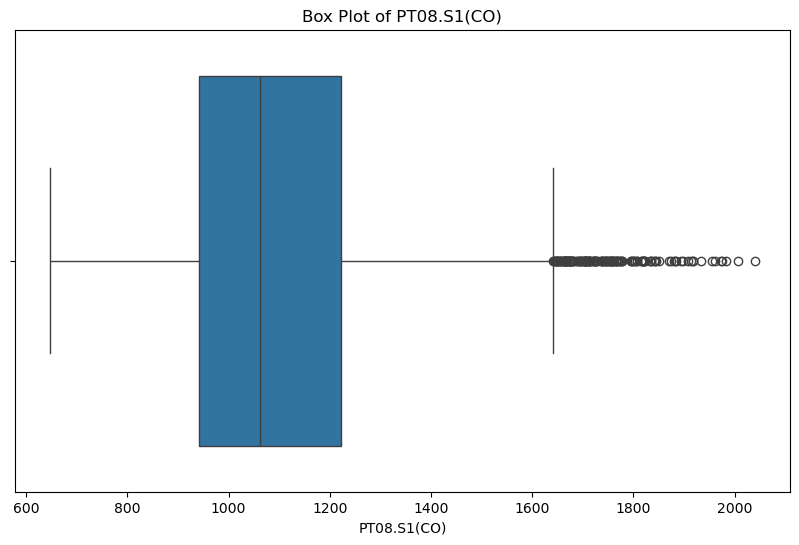

Number of outliers: 72


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Attribute to analyze
attribute = 'PT08.S1(CO)'

# Box plot to identify outliers
plt.figure(figsize=(10, 6))  # Optional: Set figure size for better visibility
sns.boxplot(x=df[attribute])
plt.title('Box Plot of ' + attribute)

# Save the plot as an image file (e.g., PNG)
plt.savefig('boxplot_' + attribute + '.png', format='png', dpi=300)

# Show the plot
plt.show()

# Z-score to identify outliers
z_scores = stats.zscore(df[attribute].dropna())
outliers = df[attribute][abs(z_scores) > 3]
print("Number of outliers:", outliers.shape[0])


# Task 3

In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_excel('AirQualityUCI.xlsx')

# Select an attribute for normalization
attribute = 'PT08.S1(CO)'

# Replace erroneous values (-200) with NaN for proper missing value handling
df[attribute] = df[attribute].replace(-200, pd.NA)

# Fill missing values in the selected attribute with its median
median_value = df[attribute].median()
df[attribute] = df[attribute].fillna(median_value)

# Normalize the attribute
scaler = MinMaxScaler()
df[attribute + '_normalized'] = scaler.fit_transform(df[[attribute]])

# Print results
print(f"Normalized values of {attribute}:")
print(df[[attribute, attribute + '_normalized']].head())


Normalized values of PT08.S1(CO):
   PT08.S1(CO)  PT08.S1(CO)_normalized
0      1360.00                0.511849
1      1292.25                0.463196
2      1402.00                0.542011
3      1375.50                0.522980
4      1272.25                0.448833


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2188\1415268321.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[attribute] = df[attribute].fillna(median_value)


# Task 4

In [10]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import cosine_similarity

# Load your dataset (replace with the actual file)
df = pd.read_excel('AirQualityUCI.xlsx')

# Function to recommend a similarity measure based on the dataset
def recommend_similarity_measure(df):
    # Exclude non-numeric columns like datetime
    numeric_df = df.select_dtypes(include=[np.number])

    # Check for sparsity (percentage of zero or missing values in the dataset)
    sparsity_threshold = 0.4  # Define sparsity threshold (40%)
    missing_or_zero = (numeric_df.isnull() | (numeric_df == -200)).sum().sum()
    total_values = numeric_df.size
    sparsity = missing_or_zero / total_values

    # Check for feature scaling (variance across features)
    variance = numeric_df.var()

    # Remove columns with zero variance to avoid division by zero
    variance = variance[variance > 0]

    feature_scale_threshold = 1e3  # Define threshold for large variance differences between features

    # Check dimensionality (number of features)
    num_features = numeric_df.shape[1]
    dimensionality_threshold = 20  # Define dimensionality threshold (20 features)

    print(f"Sparsity: {sparsity:.2f}")
    print(f"Variance of features:\n{variance}")
    print(f"Number of features: {num_features}")

    if sparsity > sparsity_threshold:
        print("\nYour data is sparse. Cosine similarity is recommended.")
        return 'cosine'

    # Check if there are any non-zero variances before performing division
    if len(variance) > 0 and variance.min() > 0:
        if variance.max() / variance.min() > feature_scale_threshold:
            print("\nThere is a large difference in feature scales. Cosine similarity is recommended.")
            return 'cosine'

    if num_features > dimensionality_threshold:
        print("\nYou have high-dimensional data. Cosine similarity is recommended.")
        return 'cosine'

    print("\nEuclidean distance is recommended for your data.")
    return 'euclidean'

# Sampling 20 data points from the dataset
sample_df = df.sample(n=20, random_state=42)

# Recommending a similarity measure based on the dataset
similarity_measure = recommend_similarity_measure(sample_df)
print(f"\nRecommended similarity measure: {similarity_measure}")



Sparsity: 0.10
Variance of features:
CO(GT)            5450.572526
PT08.S1(CO)      14264.341447
C6H6(GT)            14.520392
PT08.S2(NMHC)    27753.683553
NOx(GT)          24278.329368
PT08.S3(NOx)     22406.318914
NO2(GT)          10778.039895
PT08.S4(NO2)     77232.732072
PT08.S5(O3)      73807.262500
T                   71.088455
RH                 393.671873
AH                   0.114402
dtype: float64
Number of features: 13

There is a large difference in feature scales. Cosine similarity is recommended.

Recommended similarity measure: cosine


In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_excel('AirQualityUCI.xlsx')

# Select numeric columns for sampling
numeric_df = df.select_dtypes(include=[np.number])

# Handle missing values: fill with median
numeric_df = numeric_df.fillna(numeric_df.median())

# Sample 20 data points from the dataset
sample_df = numeric_df.sample(n=20, random_state=42)

# Compute pairwise similarity
def compute_pairwise_similarity(df, measure='cosine'):
    if measure == 'euclidean':
        # Compute pairwise Euclidean distances
        distances = pd.DataFrame(
            np.linalg.norm(df.values[:, np.newaxis] - df.values[np.newaxis, :], axis=2),
            columns=df.index, index=df.index
        )
        return distances
    elif measure == 'cosine':
        # Compute pairwise cosine similarities
        similarities = pd.DataFrame(
            cosine_similarity(df),
            columns=df.index, index=df.index
        )
        return similarities
    else:
        raise ValueError("Unsupported similarity measure")

# Choose similarity measure (adjust based on your recommendation)
similarity_measure = 'cosine'  # or 'euclidean'
similarity_df = compute_pairwise_similarity(sample_df, measure=similarity_measure)

# Find the pair with the maximum similarity or minimum distance
if similarity_measure == 'euclidean':
    # Find minimum distance
    min_distance = similarity_df.values[np.triu_indices(len(similarity_df), k=1)].min()
    max_similarity_pair = np.where(similarity_df == min_distance)
    max_similarity_index = (max_similarity_pair[0][0], max_similarity_pair[1][0])
    similarity_value = min_distance
else:
    # Find maximum similarity
    max_similarity = similarity_df.values[np.triu_indices(len(similarity_df), k=1)].max()
    max_similarity_pair = np.where(similarity_df == max_similarity)
    max_similarity_index = (max_similarity_pair[0][0], max_similarity_pair[1][0])
    similarity_value = max_similarity

# Output results
print(f"Pair with maximum similarity ({similarity_measure} measure):")
print(f"Index {sample_df.index[max_similarity_index[0]]} and Index {sample_df.index[max_similarity_index[1]]}")
print(f"Similarity score: {similarity_value}")

# Analyze the most similar pair
print(f"\nData for pair {sample_df.index[max_similarity_index[0]]}:")
print(sample_df.loc[sample_df.index[max_similarity_index[0]]])
print(f"Data for pair {sample_df.index[max_similarity_index[1]]}:")
print(sample_df.loc[sample_df.index[max_similarity_index[1]]])


Pair with maximum similarity (cosine measure):
Index 2973 and Index 2543
Similarity score: 0.9991412440721056

Data for pair 2973:
CO(GT)              1.300000
PT08.S1(CO)       932.750000
NMHC(GT)         -200.000000
C6H6(GT)            6.412912
PT08.S2(NMHC)     830.750000
NOx(GT)           105.000000
PT08.S3(NOx)      888.250000
NO2(GT)            72.000000
PT08.S4(NO2)     1514.000000
PT08.S5(O3)       709.500000
T                  25.950000
RH                 34.850000
AH                  1.150921
Name: 2973, dtype: float64
Data for pair 2543:
CO(GT)              1.600000
PT08.S1(CO)       988.500000
NMHC(GT)         -200.000000
C6H6(GT)            7.760400
PT08.S2(NMHC)     889.250000
NOx(GT)            85.000000
PT08.S3(NOx)      888.750000
NO2(GT)            89.000000
PT08.S4(NO2)     1602.250000
PT08.S5(O3)       663.500000
T                  35.250000
RH                 20.800000
AH                  1.166367
Name: 2543, dtype: float64


# Task 5

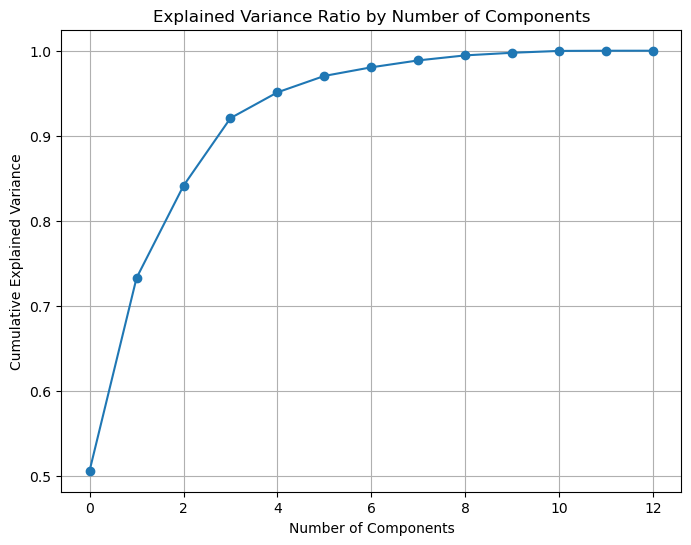

Number of components to retain 95% variance: 5


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = df.select_dtypes(include=[int, float])


# Assume df is your DataFrame with features
X = df.values
X = StandardScaler().fit_transform(X)  # Standardize features

# Fit PCA
pca = PCA()
pca.fit(X)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance
plt.figure(figsize=(8, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()

# Choose number of components to retain 95% of variance
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")


Pair with maximum similarity after PCA (cosine measure):
Index 1745 and Index 1313
Similarity score: 0.9951399136331334

Data for pair 1745:
PC1   -0.811774
PC2    0.236580
PC3   -0.076626
PC4   -0.147091
PC5   -0.680854
Name: 1745, dtype: float64
Data for pair 1313:
PC1   -0.906101
PC2    0.294099
PC3    0.031024
PC4   -0.171309
PC5   -0.751658
Name: 1313, dtype: float64


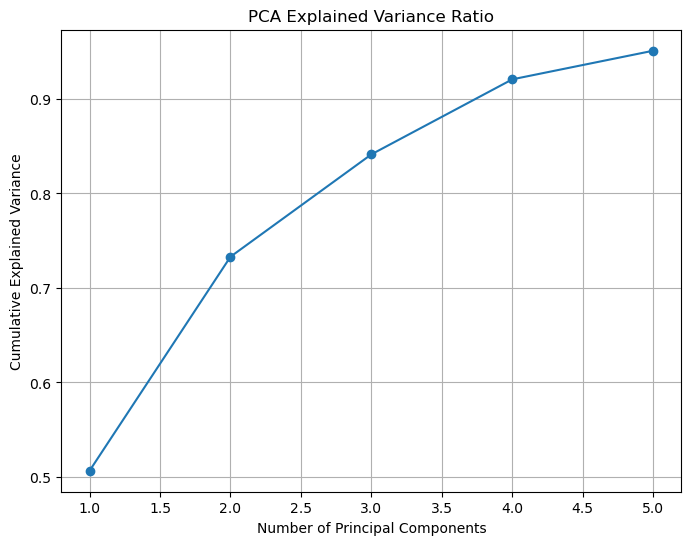

In [13]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_excel('AirQualityUCI.xlsx')

# Select numeric columns for processing
numeric_df = df.select_dtypes(include=[np.number])

# Handle missing values: fill with median
numeric_df = numeric_df.fillna(numeric_df.median())

# Standardize features
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# Dimensionality Reduction using PCA
def apply_pca(df, n_components):
    pca = PCA(n_components=n_components)
    reduced_df = pd.DataFrame(pca.fit_transform(df), columns=[f'PC{i+1}' for i in range(n_components)], index=df.index)
    return reduced_df, pca

# Apply PCA to reduce dimensions to 5
n_components = 5
reduced_df, pca = apply_pca(scaled_df, n_components)

# Sample 20 data points from the reduced dataset
sample_reduced_df = reduced_df.sample(n=20, random_state=42)

# Compute pairwise similarity
def compute_pairwise_similarity(df, measure='cosine'):
    if measure == 'euclidean':
        distances = pd.DataFrame(
            np.linalg.norm(df.values[:, np.newaxis] - df.values[np.newaxis, :], axis=2),
            columns=df.index, index=df.index
        )
        return distances
    elif measure == 'cosine':
        similarities = pd.DataFrame(
            cosine_similarity(df),
            columns=df.index, index=df.index
        )
        return similarities
    else:
        raise ValueError("Unsupported similarity measure")

# Choose similarity measure
similarity_measure = 'cosine'  # or 'euclidean'
similarity_df_reduced = compute_pairwise_similarity(sample_reduced_df, measure=similarity_measure)

# Find the pair with the maximum similarity or minimum distance
if similarity_measure == 'euclidean':
    min_distance = similarity_df_reduced.values[np.triu_indices(len(similarity_df_reduced), k=1)].min()
    max_similarity_pair = np.where(similarity_df_reduced == min_distance)
    max_similarity_index = (max_similarity_pair[0][0], max_similarity_pair[1][0])
    similarity_value = min_distance
else:
    max_similarity = similarity_df_reduced.values[np.triu_indices(len(similarity_df_reduced), k=1)].max()
    max_similarity_pair = np.where(similarity_df_reduced == max_similarity)
    max_similarity_index = (max_similarity_pair[0][0], max_similarity_pair[1][0])
    similarity_value = max_similarity

# Output results
print(f"Pair with maximum similarity after PCA ({similarity_measure} measure):")
print(f"Index {sample_reduced_df.index[max_similarity_index[0]]} and Index {sample_reduced_df.index[max_similarity_index[1]]}")
print(f"Similarity score: {similarity_value}")

# Analyze the most similar pair
print(f"\nData for pair {sample_reduced_df.index[max_similarity_index[0]]}:")
print(sample_reduced_df.loc[sample_reduced_df.index[max_similarity_index[0]]])
print(f"Data for pair {sample_reduced_df.index[max_similarity_index[1]]}:")
print(sample_reduced_df.loc[sample_reduced_df.index[max_similarity_index[1]]])

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('PCA Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [14]:
# Compute pairwise similarity on original data
sample_df_original = scaled_df.sample(n=20, random_state=42)
similarity_df_original = compute_pairwise_similarity(sample_df_original, measure=similarity_measure)

# Find pair with maximum similarity in the original data
if similarity_measure == 'euclidean':
    min_distance_original = similarity_df_original.values[np.triu_indices(len(similarity_df_original), k=1)].min()
    max_similarity_pair_original = np.where(similarity_df_original == min_distance_original)
    max_similarity_index_original = (max_similarity_pair_original[0][0], max_similarity_pair_original[1][0])
    similarity_value_original = min_distance_original
else:
    max_similarity_original = similarity_df_original.values[np.triu_indices(len(similarity_df_original), k=1)].max()
    max_similarity_pair_original = np.where(similarity_df_original == max_similarity_original)
    max_similarity_index_original = (max_similarity_pair_original[0][0], max_similarity_pair_original[1][0])
    similarity_value_original = max_similarity_original

# Compare original vs PCA results
print(f"--- Before PCA (Original Data) ---")
print(f"Pair with maximum similarity: Index {sample_df_original.index[max_similarity_index_original[0]]} and Index {sample_df_original.index[max_similarity_index_original[1]]}")
print(f"Similarity score: {similarity_value_original}\n")

print(f"--- After PCA (Reduced Data) ---")
print(f"Pair with maximum similarity: Index {sample_reduced_df.index[max_similarity_index[0]]} and Index {sample_reduced_df.index[max_similarity_index[1]]}")
print(f"Similarity score: {similarity_value}\n")

# Compare the data for both cases
print(f"Data comparison for the most similar pairs:")
print(f"Original Data Pair: \n{sample_df_original.loc[[sample_df_original.index[max_similarity_index_original[0]], sample_df_original.index[max_similarity_index_original[1]]]]}")
print(f"Reduced Data Pair (PCA): \n{sample_reduced_df.loc[[sample_reduced_df.index[max_similarity_index[0]], sample_reduced_df.index[max_similarity_index[1]]]]}")


--- Before PCA (Original Data) ---
Pair with maximum similarity: Index 2973 and Index 2543
Similarity score: 0.9340397518009561

--- After PCA (Reduced Data) ---
Pair with maximum similarity: Index 1745 and Index 1313
Similarity score: 0.9951399136331334

Data comparison for the most similar pairs:
Original Data Pair: 
        CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
2973  0.457259    -0.352092  -0.29267  0.109898      -0.186171 -0.247092   
2543  0.461122    -0.183050  -0.29267  0.142463      -0.015267 -0.324789   

      PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH  \
2973      0.290029  0.109231      0.262511    -0.580986  0.374374 -0.090477   
2543      0.291582  0.243169      0.451416    -0.681665  0.589647 -0.364822   

            AH  
2973  0.204968  
2543  0.205364  
Reduced Data Pair (PCA): 
           PC1       PC2       PC3       PC4       PC5
1745 -0.811774  0.236580 -0.076626 -0.147091 -0.680854
1313 -0.906101  0.294099 